In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [16]:
df = pd.read_csv('diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [17]:
df.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


In [18]:
df.shape

(768, 9)

In [19]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [20]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [22]:
df[['Pregnancies']]

,Pregnancies
0,6
1,1
2,8
3,1
4,0
...,...
763,10
764,2
765,5
766,1


In [23]:
np.min(df[['Pregnancies']])

Pregnancies    0
dtype: int64

In [24]:
X = df[['Glucose']]
y = df['Outcome']

In [25]:
y

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64

/home/hamza/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


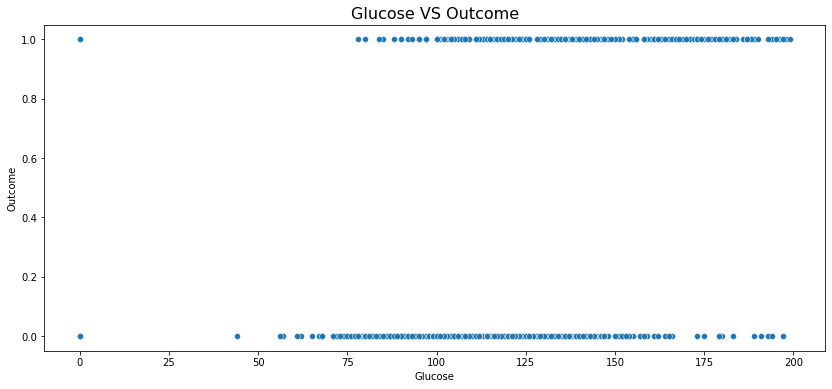

In [26]:
plt.figure(figsize=(14,6))
plt.title("Glucose VS Outcome",fontsize = 16)
sns.set_style("darkgrid")
sns.scatterplot('Glucose','Outcome',data=df)
plt.show()

In [27]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 0)

In [28]:
X_train

,Glucose
603,150
118,97
247,165
157,109
468,120
...,...
763,101
192,159
629,94
559,85


In [29]:
y_train

603    1
118    0
247    0
157    0
468    1
      ..
763    0
192    1
629    0
559    0
684    0
Name: Outcome, Length: 614, dtype: int64

In [30]:
len(X_train)

614

In [31]:
len(X_test)

154

In [32]:
from sklearn.linear_model import LogisticRegression

In [33]:
lr = LogisticRegression().fit(X_train,y_train)

In [34]:
lr.coef_

array([[0.03720388]])

In [35]:
lr.intercept_

array([-5.20536891])

In [36]:
lr.classes_

array([0, 1])

In [37]:
X1 = np.array(X).reshape(1,len(X))
X1 = X1[0]

In [38]:
y_predict = lr.predict(X)
y_predict

array([1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0,
       1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1,

In [39]:
lr.predict(X_test)

array([1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0])

In [40]:
def sigmoid(x):
    return 1/(1+np.exp(-x))

/home/hamza/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/home/hamza/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 0, 'Glucose')

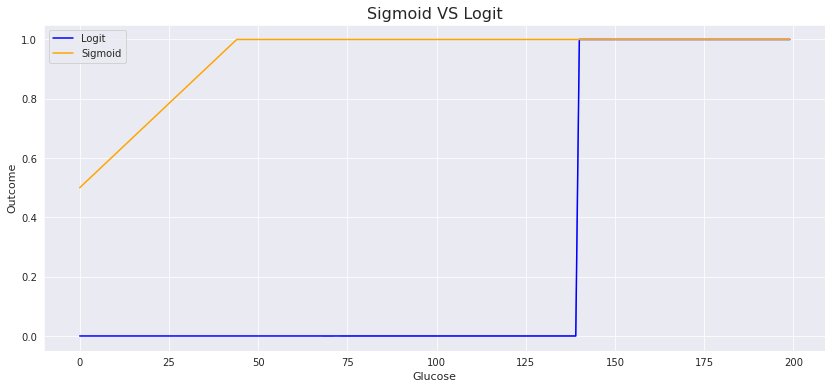

In [41]:
plt.figure(figsize=(14,6))
plt.title("Sigmoid VS Logit",fontsize = 16)
sns.set_style("darkgrid")
sns.lineplot(X1,y_predict,label='Logit',color='blue')
sns.lineplot(X1,sigmoid(X1),label='Sigmoid',color='orange')
plt.ylabel('Outcome', fontsize = 11)
plt.xlabel('Glucose', fontsize = 11)

In [42]:
def Model(features):
    return [1 if sigmoid(lr.intercept_ + lr .coef_[0]*x)>0.5 else 0 for x in features]

In [43]:
Model([197])

[1]

In [44]:
Model([110,139,100,84,44])

[0, 0, 0, 0, 0]

In [45]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y,lr.predict(X))
cm

array([[438,  62],
       [133, 135]])

In [46]:
print('TN ---> ',cm[0][0])
print('FN ---> ',cm[0][1])
print('FP ---> ',cm[1][0])
print('TP ---> ',cm[1][1])

TN --->  438
FN --->  62
FP --->  133
TP --->  135


In [47]:
y_real = [0,0,0,0,1,1,1,1,1,1]
y_pred = [0,0,0,1,1,0,1,1,0,1]
confusion_matrix(y_real,y_pred)

array([[3, 1],
       [2, 4]])

In [48]:
list(zip(y_real,y_pred))

[(0, 0),
 (0, 0),
 (0, 0),
 (0, 1),
 (1, 1),
 (1, 0),
 (1, 1),
 (1, 1),
 (1, 0),
 (1, 1)]

In [49]:
def Confusion_Matrix(actual, predicted, n_classes):
    m = [[0] * n_classes for i in range(n_classes)]
    for pred, exp in zip(predicted, actual):
        m[exp][pred] += 1
    return np.array(m)

In [50]:
Confusion_Matrix(y_real,y_pred,2)

array([[3, 1],
       [2, 4]])

In [51]:
cm

array([[438,  62],
       [133, 135]])

In [52]:
print('accuracy --> ',(cm[0][0]+cm[1][1])/cm.sum())
print('precision --> ',cm[1][1]/cm[:,1].sum())
print('recall --> ',cm[1][1]/cm[1,:].sum())
a = cm[1][1]/cm[:,1].sum()
b = cm[1][1]/cm[1,:].sum()
print('f1_score --> ',2*a*b/(a+b))

accuracy -->  0.74609375
precision -->  0.6852791878172588
recall -->  0.503731343283582
f1_score -->  0.5806451612903226


In [53]:
from sklearn.metrics import accuracy_score,recall_score,precision_score,f1_score
print('accuracy --> ',accuracy_score(y,lr.predict(X)))
print('precision --> ',precision_score(y,lr.predict(X)))
print('recall --> ',recall_score(y,lr.predict(X)))
print('f1_score --> ',f1_score(y,lr.predict(X)))

accuracy -->  0.74609375
precision -->  0.6852791878172588
recall -->  0.503731343283582
f1_score -->  0.5806451612903226


<AxesSubplot:>

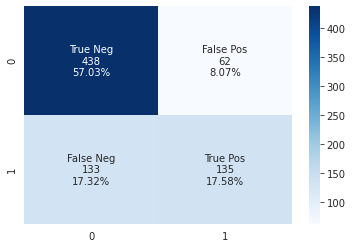

In [54]:
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ['{0:0.0f}'.format(value) for value in
                cm.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cm.flatten()/np.sum(cm)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cm, annot=labels, fmt="", cmap='Blues')